In [29]:
import numpy as np
import pandas as pd
from scipy.stats import levene, ttest_ind, mannwhitneyu
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
import math
import matplotlib.pyplot as plt

In [3]:
samples = pd.read_csv("artifacts/aa_test.csv")
samples.head()

,Sample 1,Sample 2
0,38.74,42.74
1,34.79,38.79
2,43.83,47.83
3,38.82,42.82
4,36.84,40.84


In [4]:
samples.shape

(25, 2)

In [5]:
statistic, p_value = levene(samples["Sample 1"], samples["Sample 2"])

statistic_rounded = round(statistic, 3)
p_value_rounded = round(p_value, 3)

reject_null = (p_value_rounded <= 0.05)
variances_equal = not reject_null

print("Leven's test")
print(f"Test Statistic: {statistic_rounded}")
print(f"P-Value: {p_value_rounded}")
print(f"Reject null hypothesis: {'yes' if reject_null else 'no'}")
print(f"Variance are equal: {'yes' if variances_equal else 'no'}")

Leven's test
Test Statistic: 0.0
P-Value: 1.0
Reject null hypothesis: no
Variance are equal: yes


In [6]:
equal_variances = (p_value_rounded >= 0.05)

t_stat, p_val = ttest_ind(samples["Sample 1"], samples["Sample 2"], equal_var=equal_variances)
t_stat_rounded = round(t_stat, 3)
p_val_rounded = round(p_val, 3)

reject_null = p_val_rounded < 0.05
means_equal = not reject_null

print("T-test")
print(f"Test Statistic: {t_stat_rounded}")
print(f"P-Value: {p_val_rounded}")
print(f"Reject null hypothesis: {'yes' if reject_null else 'no'}")
print(f"Means are equal: {'yes' if means_equal else 'no'}")

T-test
Test Statistic: -3.432
P-Value: 0.001
Reject null hypothesis: yes
Means are equal: no


In [7]:
analysis = TTestIndPower()

sample_size = analysis.solve_power(effect_size=0.2,
                                   power=0.8,
                                   alpha=0.05,
                                   alternative="two-sided"
)
total_sample_size = math.ceil(sample_size) * 2
rounded = math.ceil(total_sample_size / 100) * 100

print('Total Sample Size: %3.f' % rounded)

Total Sample Size: 800


In [8]:
smple_size = tt_ind_solve_power(effect_size=0.2,
                                 power=0.8,
                                 alpha=0.05,
                                 alternative="two-sided"
)
total_smple_size = math.ceil(smple_size) * 2
rounded = math.ceil(total_smple_size / 100) * 100

print('Total Sample Size: %3.f' % rounded)

Total Sample Size: 800


In [9]:
samples2 = pd.read_csv("artifacts/ab_test.csv")
samples2.head()

,session_id,group,date,session_duration,order_value
0,5aaffadb-eb83-455c-9754-a17fc82dd80e,Control,2021-06-01,14.55,4.51
1,c1bf8b62-2058-49f0-b888-042357895e9b,Experimental,2021-06-01,15.20,78.26
2,32c312b8-56e2-4f5a-ab67-23a0ea31ade5,Control,2021-06-01,11.13,31.32
3,682bd25f-bd8c-49d9-b097-cde08b07b6f5,Control,2021-06-01,16.17,19.92
4,d7c675dd-9213-42e1-b3b7-758957f3f466,Experimental,2021-06-01,13.85,9.53


In [10]:
samples2["group"].value_counts()

group
Control         400
Experimental    400
Name: count, dtype: int64

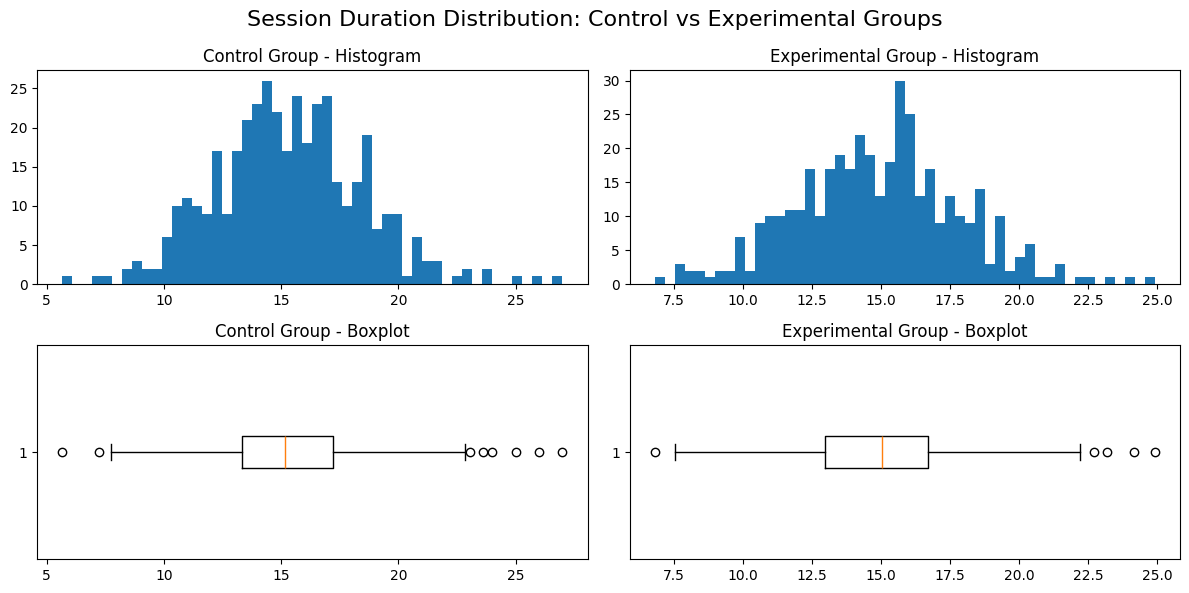

In [23]:
cont_samples = samples2[samples2.group == "Control"]
expe_samples = samples2[samples2.group == "Experimental"]

fig, axes = plt.subplots(2, 2, figsize=(12,6))

axes[0, 0].hist(x=cont_samples["session_duration"], bins=50)
axes[0, 0].set_title("Control Group - Histogram")

axes[1, 0].boxplot(x=cont_samples["session_duration"], vert=False)
axes[1, 0].set_title("Control Group - Boxplot")

axes[0, 1].hist(expe_samples["session_duration"], bins=50)
axes[0, 1].set_title("Experimental Group - Histogram")

axes[1, 1].boxplot(expe_samples["session_duration"], vert=False)
axes[1, 1].set_title("Experimental Group - Boxplot")

fig.suptitle("Session Duration Distribution: Control vs Experimental Groups", fontsize=16)

plt.tight_layout()
plt.show()

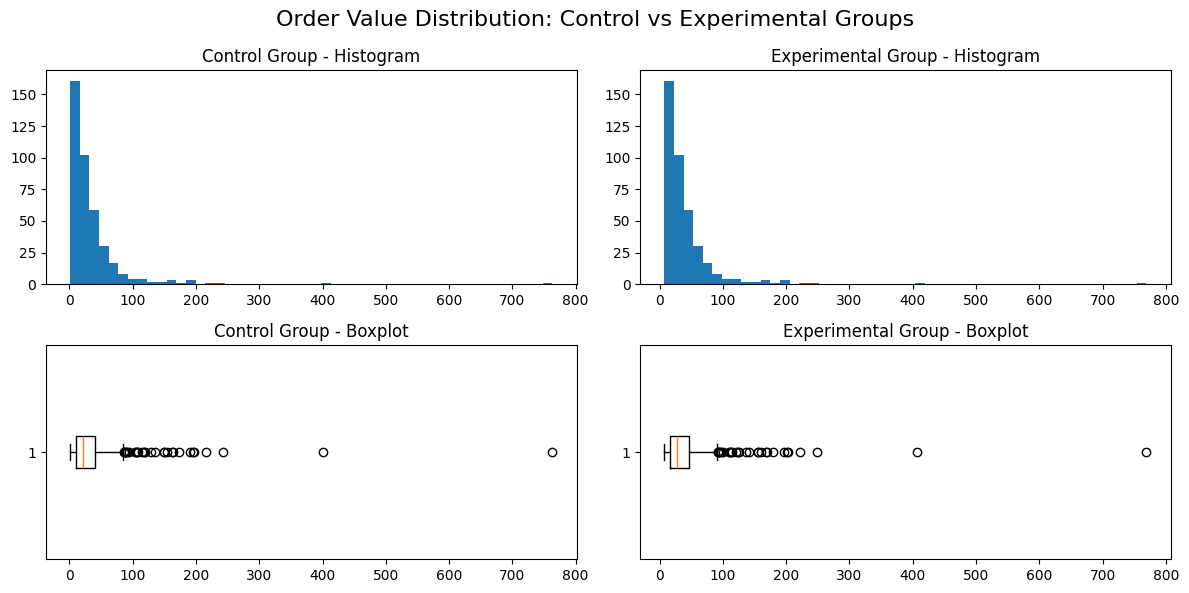

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12,6))

axes[0, 0].hist(x=cont_samples["order_value"], bins=50)
axes[0, 0].set_title("Control Group - Histogram")

axes[1, 0].boxplot(x=cont_samples["order_value"], vert=False)
axes[1, 0].set_title("Control Group - Boxplot")

axes[0, 1].hist(expe_samples["order_value"], bins=50)
axes[0, 1].set_title("Experimental Group - Histogram")

axes[1, 1].boxplot(expe_samples["order_value"], vert=False)
axes[1, 1].set_title("Experimental Group - Boxplot")

fig.suptitle("Order Value Distribution: Control vs Experimental Groups", fontsize=16)

plt.tight_layout()
plt.show()

In [25]:
order_value_99th = np.percentile(samples2["order_value"], 99)
session_duration_99th = np.percentile(samples2["session_duration"], 99)

filtered_samples = samples2[
    (samples2.order_value <= order_value_99th) &
    (samples2.session_duration <= session_duration_99th)
]

mean_order_value = round(samples2["order_value"].mean(), 2)
std_order_value = round(samples2["order_value"].std(), 2)
max_order_value = round(samples2["order_value"].max(), 2)

print("Order Value (cleaned data):")
print(f"Mean: {mean_order_value}")
print(f"Standard Deviation: {std_order_value}")
print(f"Maximum: {max_order_value}")

Order Value (cleaned data):
Mean: 37.61
Standard Deviation: 53.78
Maximum: 769.32


In [ ]:
exper_filtered_smples = filtered_samples[filtered_samples.group == "Experimental"]
contr_filtered_smples = filtered_samples[filtered_samples.group == "Control"]

stats, p_vl = mannwhitneyu(
    contr_filtered_smples["order_value"],
    exper_filtered_smples["order_value"],
    alternative="two-sided"
)

rounded_stats = round(stats, 3)
rounded_p_vl = round(p_vl, 3)

reject_null = (rounded_p_vl <= 0.05)
same_distro = not reject_null

print("U-Test")
print(f"Statistics: {rounded_stats}")
print(f"P Value: {rounded_p_vl}")
print(f"Reject null hypothesis: {'yes' if reject_null else 'no'}")
print(f"Distributions are equal: {'yes' if same_distro else 'no'}")
print(f"Control Median Order Value: {contr_filtered_smples['order_value'].median():.2f}")
print(f"Experimental Median Order Value: {exper_filtered_smples['order_value'].median():.2f}")

U-Test
Statistics: 60612.0
P Value: 0.0
Reject null hypothesis: yes
Distributions are equal: no
Control Median Order Value: 20.41
Experimental Median Order Value: 26.71


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_12112\664493448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_samples["order_value"] = np.log(filtered_samples["order_value"])


<Axes: ylabel='Frequency'>

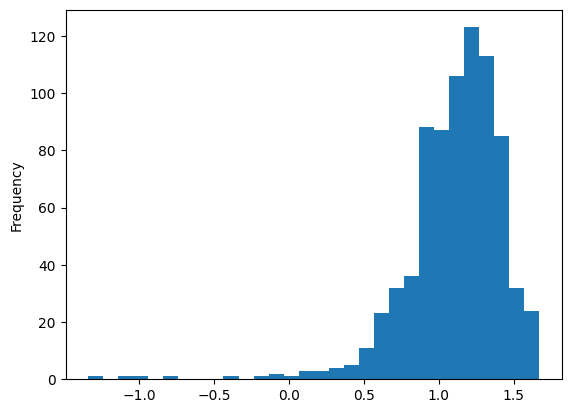

In [35]:
filtered_samples["order_value"] = np.log(filtered_samples["order_value"])
filtered_samples["order_value"].plot(bins=30, kind="hist")

In [36]:
exp_filtered_smples = filtered_samples[filtered_samples.group == "Experimental"]
co_filtered_smples = filtered_samples[filtered_samples.group == "Control"]

st, p = levene(
    exp_filtered_smples.order_value,
    co_filtered_smples.order_value
)
rounded_st = round(st, 3)
rounded_p = round(p, 3)

reject_null = (rounded_p <= 0.05)
equal_variance = not reject_null

print("Leven's test")
print(f"Test Statistic: {rounded_st}")
print(f"P-Value: {rounded_p}")
print(f"Reject null hypothesis: {'yes' if reject_null else 'no'}")
print(f"Variance are equal: {'yes' if equal_variance else 'no'}")

Leven's test
Test Statistic: 47.954
P-Value: 0.0
Reject null hypothesis: yes
Variance are equal: no


In [38]:
stat, p_vle = ttest_ind(
    exp_filtered_smples.order_value,
    co_filtered_smples.order_value,
    equal_var=equal_variance
)

rounded_stat = round(stat, 3)
rounded_p_value = round(p_vle, 3)

reject_null = (rounded_p_value <= 0.05)
equal_mean = not reject_null

print("T-test")
print(f"Test Statistic: {rounded_stat}")
print(f"P-Value: {rounded_p_value}")
print(f"Reject null hypothesis: {'yes' if reject_null else 'no'}")
print(f"Means are equal: {'yes' if equal_mean else 'no'}")

T-test
Test Statistic: 6.725
P-Value: 0.0
Reject null hypothesis: yes
Means are equal: no
